## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_df, study_df, on="Mouse ID")

# Display the data table for preview
mouse_data_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
num_mice = mouse_data_df["Mouse ID"].unique()
len(num_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = mouse_data_df.loc[mouse_data_df.duplicated(subset=["Mouse ID","Timepoint",]),"Mouse ID"].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mousedup_id = pd.DataFrame(mice_dup)


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_df.drop_duplicates("Mouse ID")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_data_df["Mouse ID"].count()

1893

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_data_df["Tumor Volume (mm3)"].describe()
 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
d_reg = mouse_data_df.groupby("Drug Regimen")
#d_reg.head(5)
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tm = d_reg["Tumor Volume (mm3)"].mean()
tmed = d_reg["Tumor Volume (mm3)"].median()
tv = d_reg["Tumor Volume (mm3)"].var()
tstd = d_reg["Tumor Volume (mm3)"].std()
tsem = d_reg["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
tv_sum_df = pd.DataFrame({"Mean": tm, "Median": tmed, "Variance": tv, "Standard Deviation": tstd, "SEM": tsem})
tv_sum_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
d_reg["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
gb = mouse_data_df.groupby("Mouse ID").max() 
gb["Timepoint"]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
next_df = mouse_data_df.merge(gb["Timepoint"], how = "inner", on=["Mouse ID", "Timepoint"])
next_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [10]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tv_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    ft_vol = next_df.loc[next_df["Drug Regimen"] ==x, "Tumor Volume (mm3)"]
    quartiles = ft_vol.quantile([.25,.5,.75])
    uq = quartiles[.75]
    lq = quartiles[.25]
    iqr = uq-lq
    ub = uq + (1.5*iqr)
    tv_data .append(ft_vol)
    lb = lq - (1.5*iqr)
    ub = uq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    print(f'A value below {lb} could be an outlier.')
    print(f'A value below {ub} could be an outlier.')

A value below 20.70456164999999 could be an outlier.
A value below 51.83201549 could be an outlier.
A value below 17.912664470000003 could be an outlier.
A value below 54.30681135 could be an outlier.
A value below 36.83290494999999 could be an outlier.
A value below 82.74144559000001 could be an outlier.
A value below 25.355449580000002 could be an outlier.
A value below 87.66645829999999 could be an outlier.


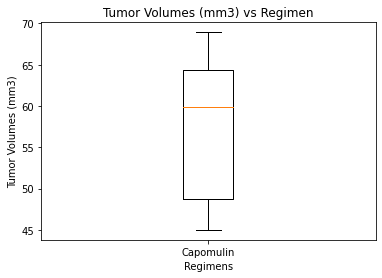

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_1 = plt.subplots()
final_1.set_title("Tumor Volumes (mm3) vs Regimen")
final_1.set_ylabel("Tumor Volumes (mm3)")
final_1.set_xlabel("Regimens")
final_1.boxplot(ft_vol)
final_1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs. Time Point for Mouse m601')

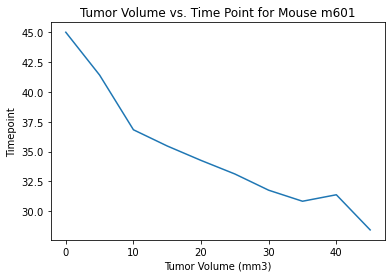

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_a = mouse_data_df.loc[mouse_data_df["Mouse ID"] == "m601"]

plt.plot(mouse_a["Timepoint"], mouse_a["Tumor Volume (mm3)"])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title(f'Tumor Volume vs. Time Point for Mouse m601')


Text(0, 0.5, 'Avg Tumor Volume (mm3)')

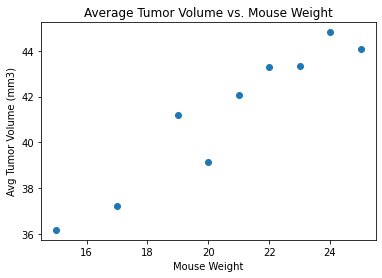

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
c_dr = mouse_data_df.loc[mouse_data_df["Drug Regimen"] == "Capomulin"]
drug_grams = c_dr.groupby("Weight (g)")

plt.scatter(drug_grams["Weight (g)"].unique(), drug_grams["Tumor Volume (mm3)"].mean())
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor Volume (mm3)")

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
coefficient = st.pearsonr(drug_grams["Weight (g)"].mean(), drug_grams["Tumor Volume (mm3)"].mean())
coefficient[0]

0.9505243961855269